[Site source](http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_ACP_Python.pdf)

# Importation des données

In [120]:
import sys
sys.path.insert(0, "/home/apprenant/PycharmProjects/ACP")
#librairie pandas
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#version
print(pd.__version__)
# 0.23.0
# Proper display method for dataframes
from IPython.display import display
#classe pour standardisation
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

1.1.3


In [121]:
#chargement de la première feuille de données
df = pd.read_excel("autos_acp_pour_python.xls",sheet_name=0,header=0,index_col=0)

In [122]:
# On ne garde que les variables continues (donc on enleve Finition), les autres c'est pour l'exercice
X=df[df.columns.difference(['FINITION', "PRIX", "R-POID.PUIS"])]

In [123]:
#dimension
print(X.shape)
#(18,6)
#nombre d'observations
n = X.shape[0]
#nombre de variables
p = X.shape[1]
#affichagedes données
display(X)

(18, 6)


,CYL,LARG,LONG,POIDS,PUISS,V-MAX
Modele,,,,,,
Alfasud TI,1350,161,393,870,79,165
Audi 100,1588,177,468,1110,85,160
Simca 1300,1294,168,424,1050,68,152
Citroen GS Club,1222,161,412,930,59,151
Fiat 132,1585,164,439,1105,98,165
Lancia Beta,1297,169,429,1080,82,160
Peugeot 504,1796,169,449,1160,79,154
Renault 16 TL,1565,163,424,1010,55,140
Renault 30,2664,173,452,1320,128,180


# Préparation des données

In [124]:
# Preprocessing for categorical data
categorical_transformer = make_pipeline(OrdinalEncoder(), StandardScaler())

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), X.select_dtypes(exclude=[object]).columns)
    ])


In [125]:
#transformation–centrage-réduction
Z = preprocessor.fit_transform(X)

display(Z)

array([[-0.77509889, -1.09734528, -1.88508077, -1.56900676, -0.28335818,
         0.56976043],
       [-0.12016326,  2.0010414 ,  1.60580955,  0.23416142,  0.01963869,
         0.14597168],
       [-0.92920139,  0.25819889, -0.44217944, -0.21663062, -0.83885242,
        -0.53209032],
       [-1.12733318, -1.09734528, -1.00072189, -1.11821472, -1.29334771,
        -0.61684807],
       [-0.12841875, -0.51639778,  0.25599862,  0.19659542,  0.67613189,
         0.56976043],
       [-0.9209459 ,  0.45184806, -0.20945342,  0.0087654 , -0.13185975,
         0.14597168],
       [ 0.45221746,  0.45184806,  0.72145067,  0.60982146, -0.28335818,
        -0.36257482],
       [-0.18345536, -0.71004695, -0.44217944, -0.51715865, -1.49534562,
        -1.54918332],
       [ 2.84080623,  1.22644473,  0.86108628,  1.81193359,  2.19111619,
         1.84112668],
       [-1.28143568, -1.87194195, -1.60580955, -1.98223281, -1.49534562,
        -1.54918332],
       [-0.16969621, -0.90369611, -0.25599862, -0.

In [126]:
# Liste des moyennes (qui doivent être nulles maintenant que c'est centré (et réduit))
print(np.mean(Z,axis=0))

[-2.22044605e-16  1.86270752e-15  0.00000000e+00  5.73615229e-16
 -1.41861831e-16  5.55111512e-16]


In [127]:
# Liste écart-type qui doivent valoir 1 maintenant que c'est réduit
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


 # Analyse PCA

On va déterminer des axes à partir de colonnes ayant une forte corrélation entre elles. 

## Instanciation et lancement des calculs

In [128]:
#instanciation
acp = PCA(svd_solver='full')

In [129]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [130]:
#calculs
coord = acp.fit_transform(Z)
#nombre de composantes calculées
print(acp.n_components_) # 6

6


## Valeurs propres et scree plot

In [134]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


Interprétation : la première composante utilise 73.7% de l'information, la seconde 14.3% etc. Les deux premières donnent donc près de 88% de l'information, 94% avec la troisième. 

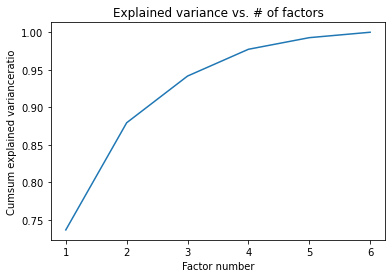

In [136]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained varianceratio")
plt.xlabel("Factor number")
plt.show()

## Détermination du nombre de facteurs à retenir   

In [137]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [138]:
#test des bâtons brisés
display(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

,Val.Propre,Seuils
0,4.420858,2.450000
1,0.856062,1.450000
2,0.373066,0.950000
3,0.213922,0.616667
4,0.092801,0.366667
5,0.043290,0.166667


En théorie, on essaye de garder les valeurs propres dont la valeur propre est supérieure au seuil avec le test des batons brisés. Cependant, on va choisir K=2 pour pouvoir les représenter dans le plan, le faire visuellement est efficace. 

## Représentation des individus 

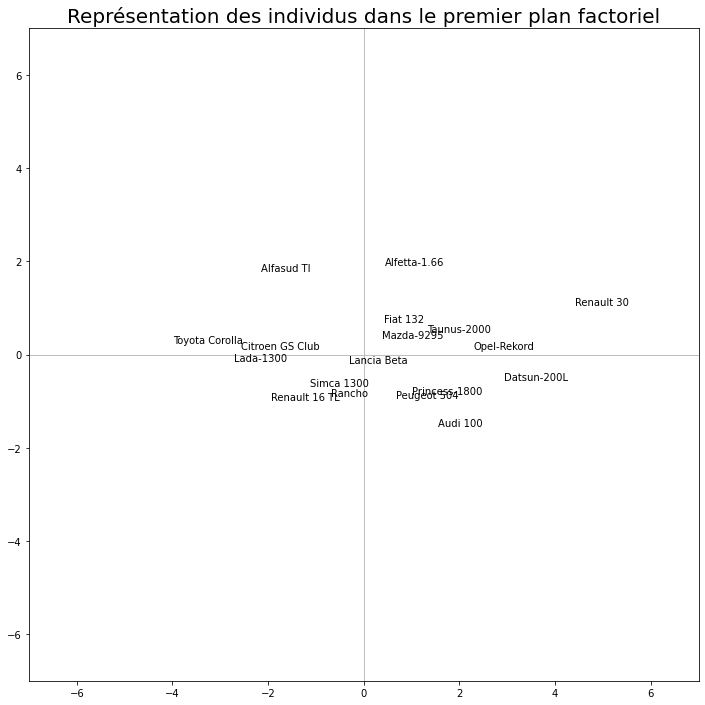

In [139]:
#positionnement des individus dans lepremier plan
fig, ax = plt.subplots(figsize=(12,12))

lim = 7
ax.set_xlim(-lim,lim) 
#même limites en abscisse
ax.set_ylim(-lim,lim) 
#et en ordonnée
#placement des étiquettes des observations
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-lim,lim],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-lim,lim],color='silver',linestyle='-',linewidth=1)

plt.title('Représentation des individus dans le premier plan factoriel', fontsize = 20)
#affichage
plt.show()

On peut observer sur ce graphe les individus en périphérie. Ce qui correspond avec le fait que la Renault 30 est la plus puissante des voitures du jeu de données, et la Toyota Corolla est la moins puissante.
Les trois prochains calculs permettent d'identifier automatiquement les individues en périphérie.

In [140]:
#contribution des individus dans l'inertie totale 
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':X.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


### Qualité de représentation

In [141]:
#qualité de représentation des individus -COS2 ; COS2_1 et COS2_2 représentent les axes du premier plan factoriel
cos2 = coord**2
for j in range(p):
    cos2[:,j] = cos2[:,j]/di
print(pd.DataFrame({'id':X.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1]}))

                 id    COS2_1    COS2_2
0        Alfasud TI  0.556218  0.387670
1          Audi 100  0.365334  0.349406
2        Simca 1300  0.580284  0.210694
3   Citroen GS Club  0.976992  0.001879
4          Fiat 132  0.156579  0.413826
5       Lancia Beta  0.081555  0.033900
6       Peugeot 504  0.309202  0.575488
7     Renault 16 TL  0.673539  0.170535
8        Renault 30  0.892431  0.051920
9    Toyota Corolla  0.975219  0.003426
10     Alfetta-1.66  0.042978  0.820652
11    Princess-1800  0.530947  0.362855
12      Datsun-200L  0.778390  0.028137
13      Taunus-2000  0.704819  0.096496
14           Rancho  0.243273  0.410469
15       Mazda-9295  0.217336  0.185337
16      Opel-Rekord  0.861900  0.001790
17        Lada-1300  0.926052  0.002607


In [142]:
#vérifions la théorie -somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Contribution des individus aux axes

In [143]:
#contributions aux axes
ctr = coord**2
for j in range(p):
    ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':X.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9295  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


In [144]:
#vérifions la théorie : les sommes en ligne doivent être égales à 1
print(np.sum(ctr,axis=0))

[1. 1. 1. 1. 1. 1.]


### Représentation des variables

In [145]:
#le champcomponents_ de l'objet ACP
print(acp.components_)

[[ 0.42493602  0.38692224  0.42145993  0.43051198  0.42179441  0.35894427]
 [ 0.12419108 -0.446087   -0.41181773 -0.24267581  0.41577389  0.6198626 ]
 [-0.35361252  0.60486812  0.06763394 -0.48439601 -0.18492049  0.48547226]
 [ 0.80778648  0.21156941 -0.27975231 -0.30171136 -0.35779199 -0.0735743 ]
 [ 0.15158003 -0.47819008  0.73056903 -0.30455842 -0.29373465  0.18865511]
 [-0.05889517 -0.10956624 -0.19029153  0.5808122  -0.63303302  0.45852167]]


In [148]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)

#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs    
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [149]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1   LARG  0.813536 -0.412736
2   LONG  0.886155 -0.381029
3  POIDS  0.905187 -0.224532
4  PUISS  0.886858  0.384689
5  V-MAX  0.754710  0.573519


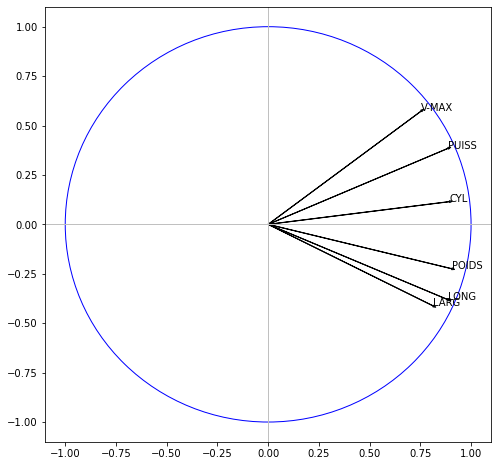

In [161]:
#cercle des corrélations
fig, ax = plt.subplots(figsize=(8,8))
lim=1.1
ax.set_xlim(-lim,lim)
ax.set_ylim(-lim,lim)
#affichage des étiquettes (noms des variables)
for j in range(p):
    plt.arrow(0, 0, corvar[j,0], corvar[j,1],head_width=0.01)
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-lim,lim],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-lim,lim],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
ax.add_artist(cercle)
#affichage
plt.show()

On peut interpreter ce cercle en le divisant en quarts. Le haut droite regroupera les voitures puissantes, rapides. En bas a droite, on retrouve les voitures lourdes et de grande dimension. En haut à gauche, on a les voitures légères et de petite dimension mais tout de même puissantes. En bas a gauche, on a les voiture de petite dimension et peu puissantes.
  
  
Calculs pour quantifier le poids de chaque variable sur les composants

### Qualité de représentation des modèles (COS²)

In [162]:
#cosinus carré des variables
cos2var = corvar**2
print(pd.DataFrame({'id':X.columns,'COS2_1':cos2var[:,0],'COS2_2':cos2var[:,1]}))

      id    COS2_1    COS2_2
0    CYL  0.798277  0.013203
1   LARG  0.661841  0.170351
2   LONG  0.785270  0.145183
3  POIDS  0.819364  0.050415
4  PUISS  0.786517  0.147986
5  V-MAX  0.569588  0.328925


### Contribution des variables aux axes (CTR)

In [163]:
#contributions
ctrvar = cos2var
for k in range(p):
    ctrvar[:,k] = ctrvar[:,k]/eigval[k]
#on n'affiche que pour les deux premiers axes
print(pd.DataFrame({'id':X.columns,'CTR_1':ctrvar[:,0],'CTR_2':ctrvar[:,1]}))

      id     CTR_1     CTR_2
0    CYL  0.180571  0.015423
1   LARG  0.149709  0.198994
2   LONG  0.177628  0.169594
3  POIDS  0.185341  0.058892
4  PUISS  0.177911  0.172868
5  V-MAX  0.128841  0.384230


# Traitement des individus et variables illustratifs

Les variables illustratives sont des variables qui n'ont pas été inclus dans la création du PCA (car non pertinentes dans les axes qu'on veut créer ou redondantes par rapport aux autres colonnes) mais qui peuvent être intéressantes à visualiser.

## Individus supplémentaires

In [183]:
list_supp = np.append("Modele", X.columns.values)

In [204]:
indSupp = pd.DataFrame(np.array([['Peugot 604', 2664, 177, 472, 1410, 136, 180], ['Peugeot 304 S', 1288, 157, 414, 915, 74, 160]]), columns=list_supp)
indSupp = indSupp.set_index('Modele')
indSupp = indSupp.astype('int32', copy=False)
display(indSupp)

,CYL,LARG,LONG,POIDS,PUISS,V-MAX
Modele,,,,,,
Peugot 604,2664,177,472,1410,136,180
Peugeot 304 S,1288,157,414,915,74,160


In [205]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = preprocessor.transform(indSupp)
print(ZIndSupp)

[[ 2.84080623  2.0010414   1.79199036  2.48812166  2.59511201  1.84112668]
 [-0.94571238 -1.87194195 -0.90763148 -1.23091273 -0.53585556  0.14597168]]


In [206]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


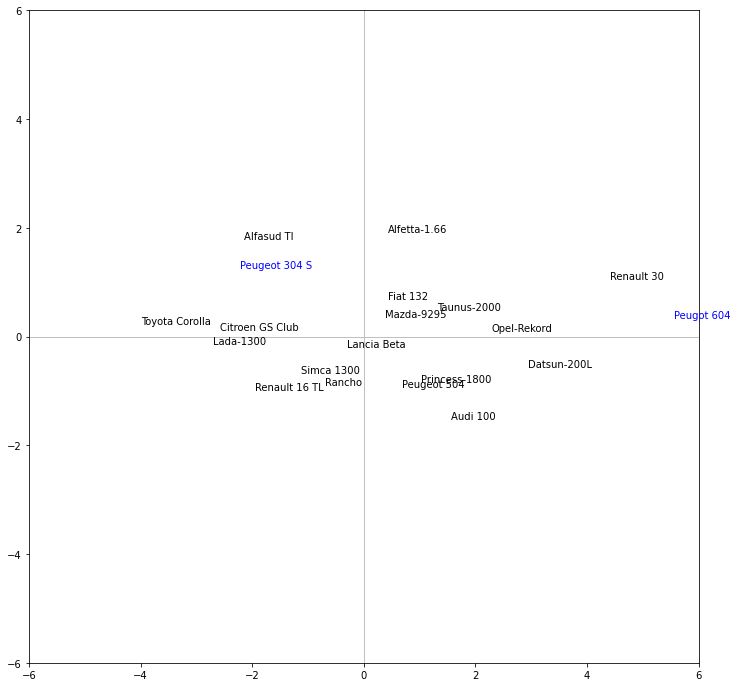

In [207]:
plt.close()
#positionnement des individus supplémentaires dans le premier plan
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#étiquette des points actifs
for i in range(n):
    plt.annotate(X.index[i],(coord[i,0],coord[i,1]))
#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

On peut voir que la Peugeot 604 a des caractéristiques proches de la Renault 30. De même, la Peugeot 304 S a des caractéristiques proches de la Alfasud T1.

## Variables supplémentaires

### Variables illustratives quantitatives

In [210]:
varSupp = df[["PRIX", "R-POID.PUIS",'FINITION']]
vsQuanti = varSupp.iloc[:,:2].values

In [216]:
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))
for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]
#affichage des corrélations avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903888 -0.67254512 -0.15017616  0.21365718  0.10162791  0.28999742]]


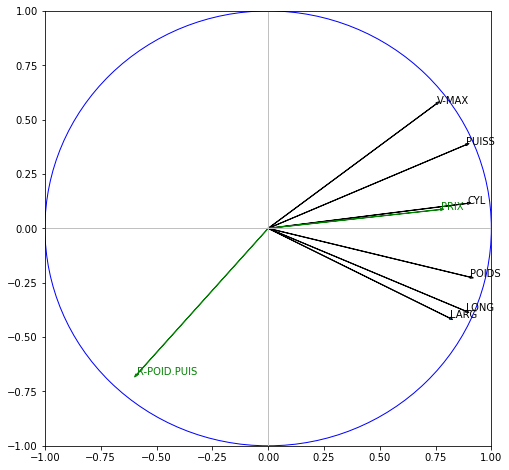

In [219]:
#cercle des corrélations avec les var. supp
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
#variables actives
for j in range(p):
    plt.arrow(0, 0, corvar[j,0], corvar[j,1],head_width=0.01)
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))
#variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.arrow(0, 0, corSupp[j,0], corSupp[j,1],head_width=0.01, color='g')
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
ax.add_artist(cercle)
#affichage
plt.show()

- La variable PRIX est globalement corrélée avec l’ensemble des variables, emportée par la première composante principale.
- R_POIDS_PUIS(rapport  poids-puissance)est  quasi-orthogonale  au  premier  facteur.  A bien y regarder, on remarquesurtout qu’elle est à l’opposéde V_MAX.

### Variable illustrative qualitative

In [220]:
#traitement de var. quali supplémentaire
vsQuali = varSupp.iloc[:,2]
print(vsQuali)

Modele
Alfasud TI          B
Audi 100           TB
Simca 1300          M
Citroen GS Club     M
Fiat 132            B
Lancia Beta        TB
Peugeot 504         B
Renault 16 TL       B
Renault 30         TB
Toyota Corolla      M
Alfetta-1.66       TB
Princess-1800       B
Datsun-200L        TB
Taunus-2000         B
Rancho             TB
Mazda-9295          M
Opel-Rekord         B
Lada-1300           M
Name: FINITION, dtype: object


In [222]:
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)

['B' 'M' 'TB']


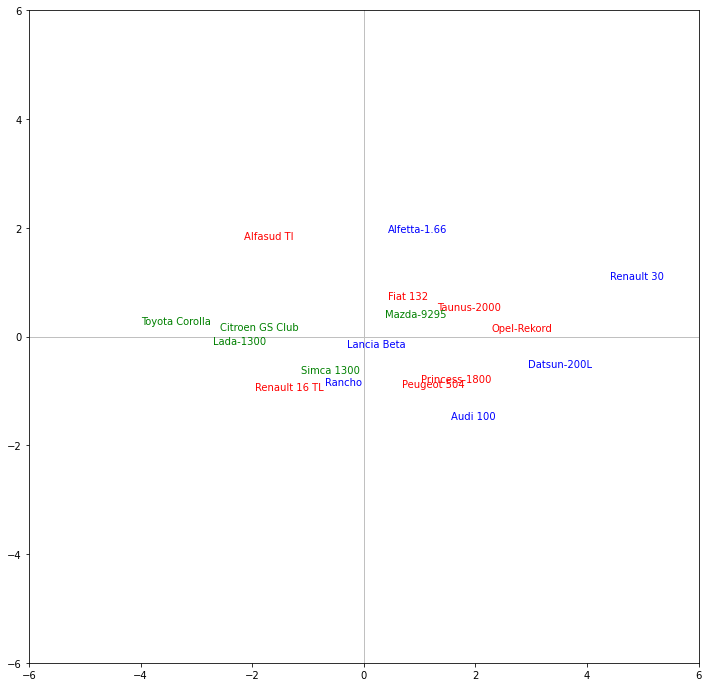

In [223]:
#liste des couleurs
couleurs = ['r','g','b']
#faire un graphique en coloriant les points
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [227]:
#structure intermédiaire
df = pd.DataFrame({'Finition':vsQuali,'F1':coord[:,0],'F2':coord[:,1]})
#puis calculer les moyennes conditionnelles
print(df.pivot_table(index='Finition',values=['F1','F2'],aggfunc=pd.Series.mean))

                F1        F2
Finition                    
B         0.235313  0.045271
M        -2.000355 -0.022579
TB        1.392430 -0.034001


Automatiser les coordonnées du cercle, les couleurs, et la taille du cercle 

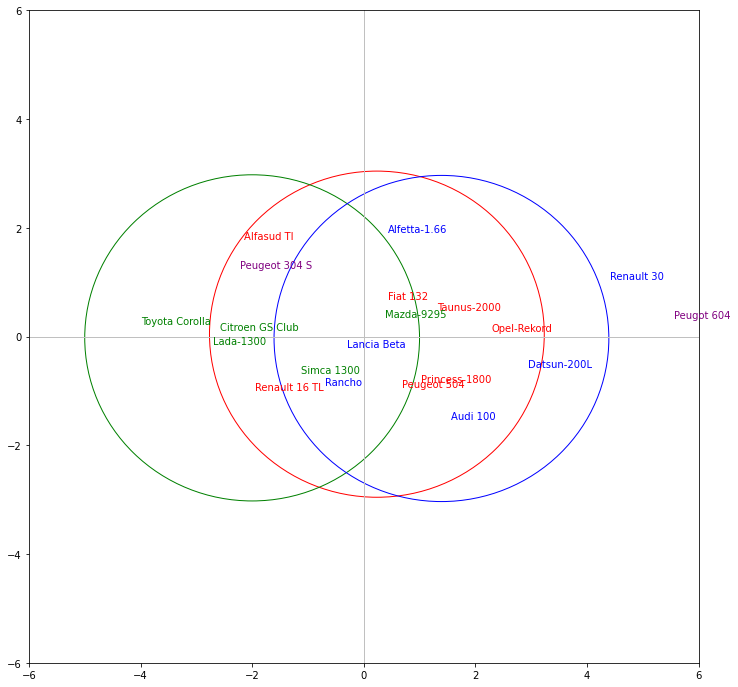

In [232]:
#liste des couleurs
couleurs = ['r','g','b']
#faire un graphique en coloriant les points
fig, ax = plt.subplots(figsize=(12,12))
ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    #les passer en revue pour affichage
    for i in numero[0]:
        plt.annotate(X.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):
    plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='purple')
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
cercle = plt.Circle((0.235313,0.045271),3,color='r',fill=False)
ax.add_artist(cercle)
cercle = plt.Circle((-2.000355,-0.022579),3,color='g',fill=False)
ax.add_artist(cercle)
cercle = plt.Circle((1.392430,-0.034001),3,color='b',fill=False)
ax.add_artist(cercle)
#affichage
plt.show()
